## Veraltet, tobi3 ist besser

In [1]:
import pandas as pd
import numpy as np

# get raw Dataset
data = pd.read_csv('data/raw_dataset/heart.csv')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Define the features (X) and the target variable (y)
X = data.drop(columns=['output'])  # Features (all columns except 'output')
y = data['output']  # Target variable

# list all numerical features that we want to re-scale
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
numeric_transformer = Pipeline([ ('scaler', StandardScaler()) ])

# list all categorical features that we want to encode using OneHotEncoder
categorical_features = ['cp', 'restecg', 'restecg', 'caa', 'thall']
categorical_transformer = Pipeline([ ('onehot', OneHotEncoder()) ])

# list all ordinal features that we want to encode using OrdinalEncoder
ordinal_features = ['sex',  'fbs', 'exng']
ordinal_transformer = Pipeline([ ('ordinal', OrdinalEncoder()) ])

# define the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)])

display(preprocessor.fit_transform(X))
display(y)
# Filter y_test to contain only 0 and 1 values
filtered_y = y[y.isin([0, 1])]
display(filtered_y.values)

array([[ 0.9521966 ,  0.76395577, -0.25633371, ...,  1.        ,
         1.        ,  0.        ],
       [-1.91531289, -0.09273778,  0.07219949, ...,  1.        ,
         0.        ,  0.        ],
       [-1.47415758, -0.09273778, -0.81677269, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.29046364, -0.09273778, -2.2275329 , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.29046364, -0.09273778, -0.19835726, ...,  0.        ,
         0.        ,  0.        ]])

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [3]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy import interp

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100)
    tprs = []
    aucs = []

    for train_indices, test_indices in cv.split(data, target):
        train_data = data.iloc[train_indices]
        train_target = target.iloc[train_indices]
        estimator.fit(train_data, train_target)

        test_data = data.iloc[test_indices]
        test_target = target.iloc[test_indices]

        decision_for_each_class = estimator.predict_proba(test_data)  # Use predict_proba

        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:, pos_label], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(auc(fpr, tpr))

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    return mean_fpr, mean_tpr, mean_auc, std_auc


KeyError: "None of [Index([ 12,  19,  22,  23,  34,  51,  54,  60,  66,  69, 101, 111, 121, 124,\n       127, 147, 162, 165, 167, 168, 179, 180, 181, 197, 219, 233, 257, 259,\n       276, 281, 288],\n      dtype='int32')] are in the [columns]"

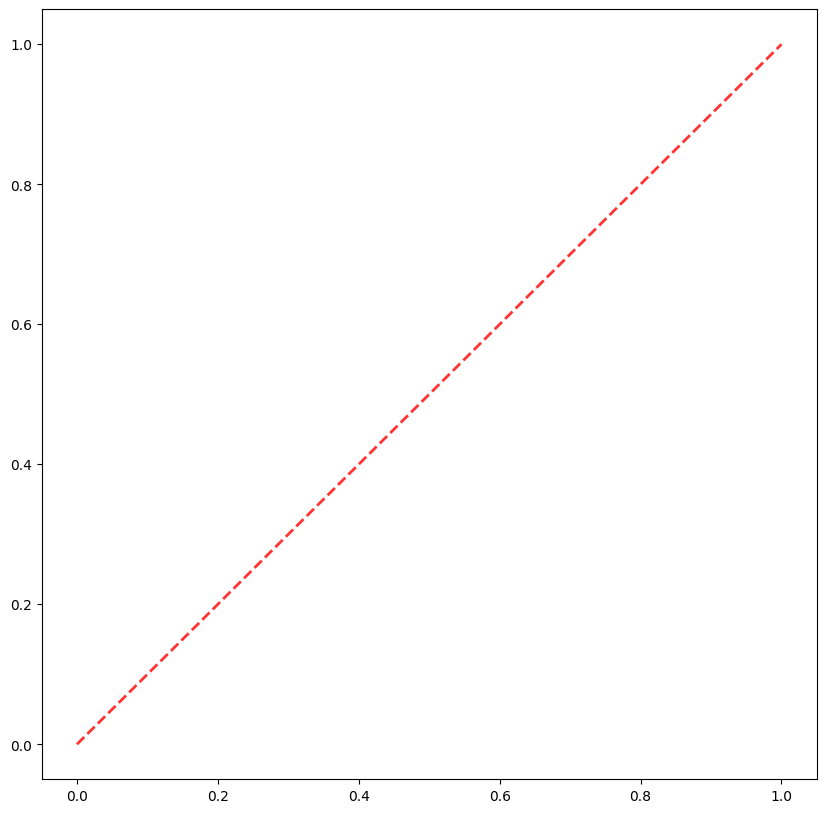

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

# Define the cross-validation folds
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the pipeline, we will set the estimator later
pipeline = Pipeline([('preprocessing', preprocessor), ('estimator', None)])

# Create an empty list to store the test indices for each fold
test_indices_list = []

# Iterate through the cross-validation splits and collect test indices
for train_indices, test_indices in cv.split(X, filtered_y):
    test_indices_list.append(test_indices)

# Define a function to plot ROC curves
def plot_roc(mean_fpr, mean_tpr, mean_auc, std_auc, label):
    plt.plot(mean_fpr, mean_tpr, label=f'{label} (AUC: {mean_auc:.3f} $\\pm$ {std_auc:.3f})')

# setup a figure
plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random', alpha=.8)  # draw diagonal

# KNN
pipeline.set_params(estimator=KNeighborsClassifier())
for n_neighbour in [2, 3, 4, 5, 6]:
    pipeline.set_params(estimator__n_neighbors=n_neighbour)
    
    # Iterate through the folds and use the corresponding test_indices
    for fold_index, test_indices in enumerate(test_indices_list):
        train_data = X[test_indices]
        train_target = filtered_y[test_indices]
        
        mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, train_data, train_target, 1)
        plot_roc(mean_fpr, mean_tpr, mean_auc, std_auc, f'{n_neighbour}-NN (Fold {fold_index})')

# Decision Tree
pipeline.set_params(estimator=DecisionTreeClassifier())
mean_fpr, mean_tpr, mean_auc, std_auc = avg_roc(cv, pipeline, X, filtered_y.values, 1)
plot_roc(mean_fpr, mean_tpr, mean_auc, std_auc, 'DecisionTree')

# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
